# Heart disease prediction dataset

https://www.kaggle.com/datasets/yasserh/heart-disease-dataset

### Dataset Explanation
- age: 
Patient's Age

- sex: 
Patient's Gender

- cp: 
Patient's CP Level

- trestbps: 
Patient's Trest BPS Level

- chol: 
Patient's Cholestrol Level

- fbs: 
Patient's FBS Level

- restecg: 
Patient's Resting ECG Levels

- thalach: 
Patient's Thalach Levels

- exang: 
Patient's Exang Levels

- oldpeak: 
Patient's Old Peak History Recorded

- slope: 
Patient's Slope Levels

- ca: 
Patient's CA Levels

- thal: 
Patient's Thal Levels

- target: 
0 - Healthy Individual 1 - Heart-Disease Patient

In [1]:
from typing import Union
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#scipy modules
from scipy import stats
from scipy.stats import norm
from scipy.stats import shapiro
from scipy.stats import skewtest as skew
from scipy.stats import kurtosistest as kurtosis

#sklearn modules
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale #standardizer 평균 0 분산을 동일하게 조정해준다.
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import confusion_matrix

%matplotlib inline

## Data Loading

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
def data_explanation(data):
    with open('./data_description.txt','w') as f:
        for i in data.columns:
            f.write(f'Feature Name: {i} \n')
            f.write(f'# of data: {len(data[i])} \n')
            f.write(f'# of unique data: {len(data[i].unique())} \n')
            f.write(f'unique datas: {data[i].unique()} \n\n')
    f.close()
data_explanation(data)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Preprocessing

In [5]:
feature_names = data.columns
feature_names

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### Scaling

In [6]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
numerical_variables = [0,3,4,7,9]
data_input = data.iloc[:,numerical_variables]
data_input_scaled = scale(data_input,axis=0,with_mean=True,with_std=True)
data.iloc[:,numerical_variables] = data_input_scaled

In [8]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


## Data Exploration

<Axes: xlabel='target', ylabel='count'>

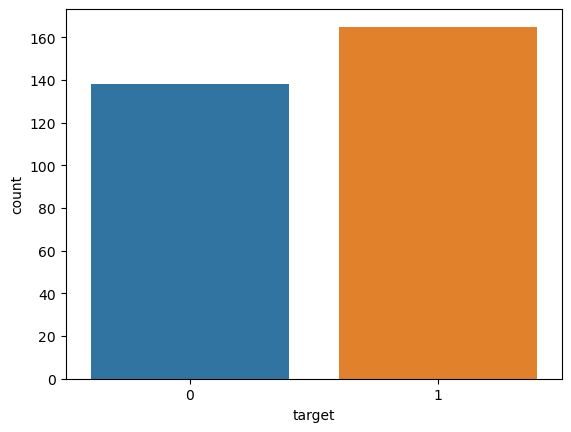

In [10]:
sns.countplot(data=data, x='target')

[Q2]
해당
데이터셋의
종속변
수와
설명변수는
어떤
것들이
있는가
?
분석
전에
아래
두
가지
질문에
대해서
스스로
생각해보고
답변을
하시오
.

1.이
데이터에서
제공된
설명변수들
중에서
높은
상관관계가
있을
것으로
예상되는
변수들은
어떤
것들이
있는가
?
왜
그렇게
생각하는가
?

2.제공된
설명변수들
중에서
종속변수를
예측하는데
필요하지
않을
것으로
예상되는
변수들은
어떤
것들이
있는가
?
왜
그렇게
생각하는가

### Correlation plot

In [11]:
X = data.drop(columns=['target']) #Explanatory Variable
y = data['target'] #Independent Variable

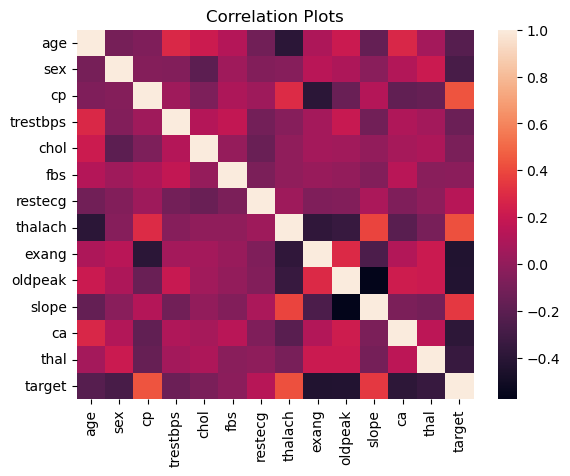

In [12]:
def correlation_plot(data):   
    corr = data.corr()
    sns.heatmap(corr)
    plt.title("Correlation Plots")
    plt.show()
    
correlation_plot(data)

- 높은 상관관계 : cp, thalach, slope 

- 낮은 상관관계: exang, oldpeak, ca, thai


보고서 쓰면서 이유 찾아보기

### Scatter Plot

이진 분류 문제여서 Scatter Plot으로 알 수 있는 정보가 너무 적다.

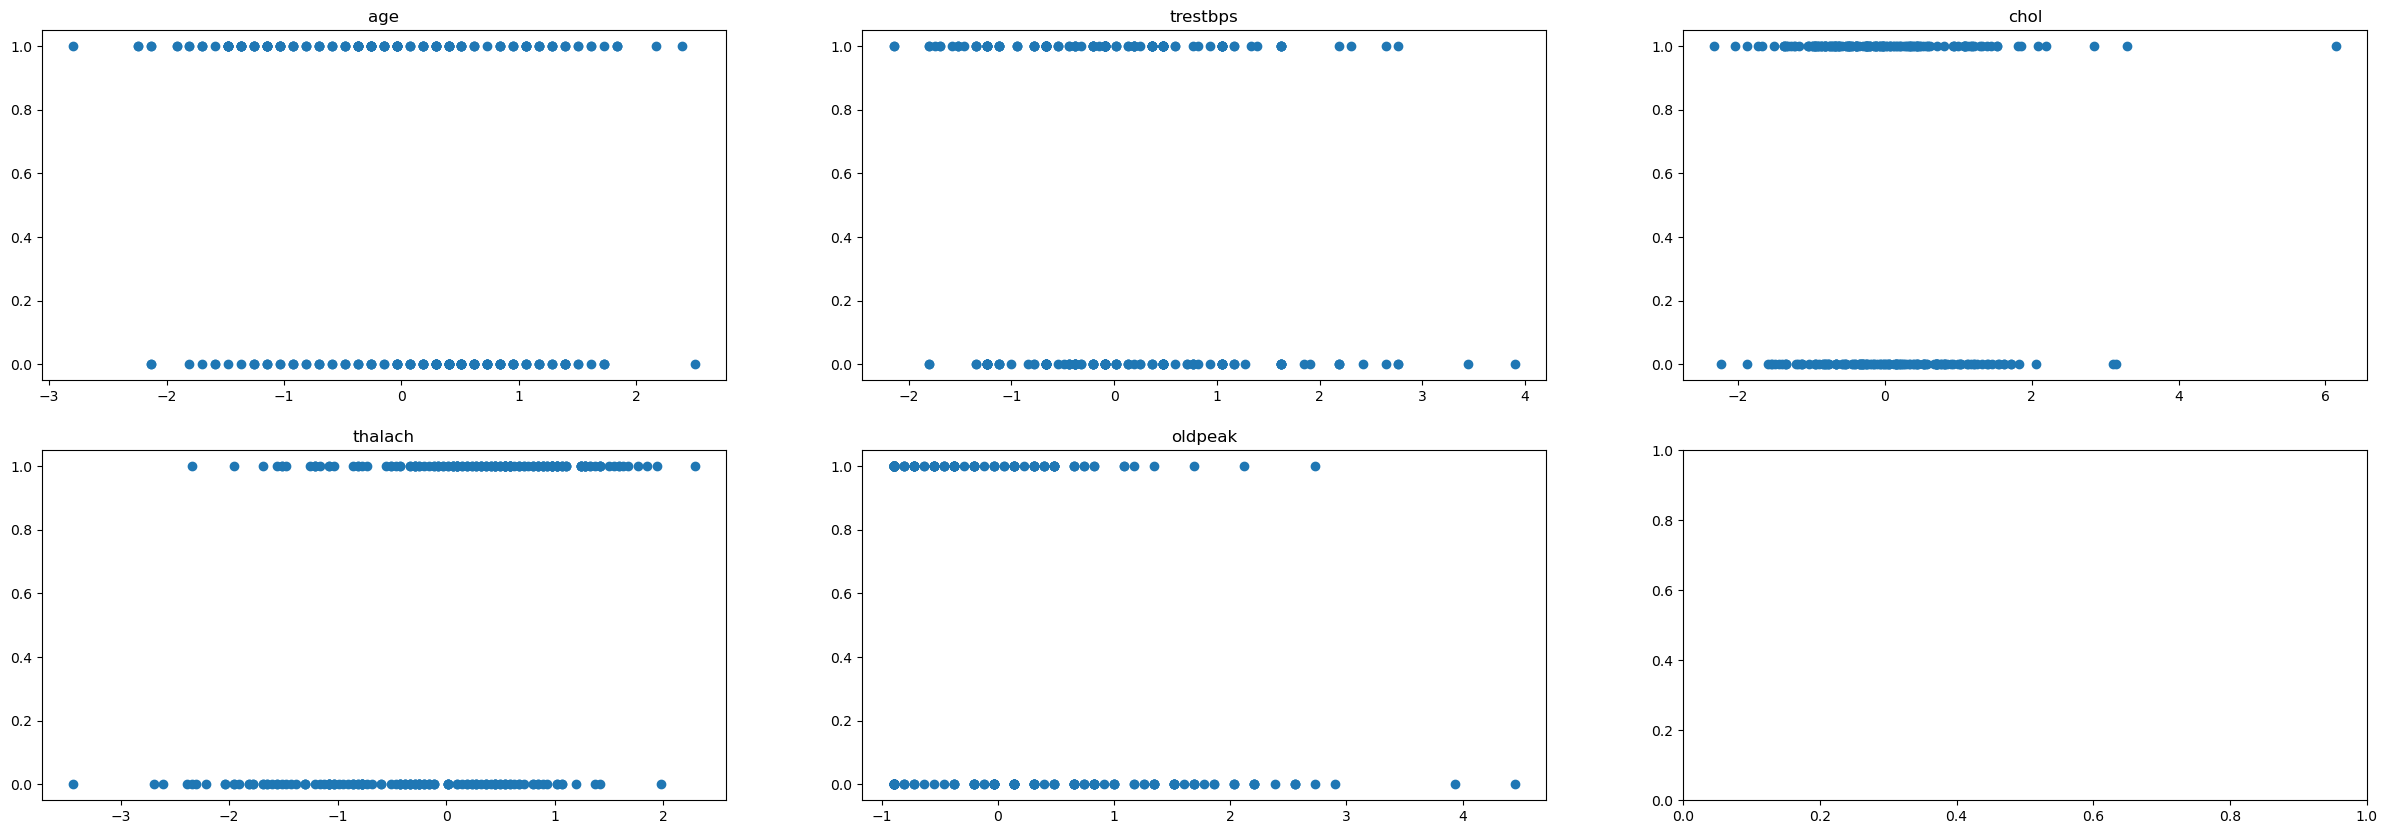

In [13]:
def scatter_plot_desplay(X, y, numerical_variables: list):
    X = X.iloc[:,numerical_variables]
    fig, axs = plt.subplots(2,len(X.columns)//2+1,figsize=(30,10))

    k , j = 0, 0
    for i in range(len(X.columns)):
        if i == len(X.columns)//2+1:
            k +=1
            j = 0
        axs[k,j].scatter(X.iloc[:,i], y)
        axs[k,j].set_title(X.columns[i])
        j +=1

    plt.show()
    
    
scatter_plot_desplay(X,y,numerical_variables)

[Q3]
모든
연속형
숫자
형태를
갖는
(
명목형
변수
제외
)
개별
입력
변수들에
대하여
각각
다음과
같은
단변
량
통계량을
계산하고
Box plot
을
도시하시오
:
Mean, Standard deviation, Skewness, Kurtosis.


전체
변수
중에서
정규분포를
따른다고
할
수
있는
변수들은
몇
개인가
?
정규분포를
따른다고
가정한
근거는
무엇인
가
?

In [14]:
def statistics(data, numerical_columns:int):
    """
    input: Pandas DataFrame, 제외할 Column 시작 index number
    output: statistics DataFrame
    """
    df_stat = pd.DataFrame(columns = ['mean','std','skewness','skew_pvalue','kurtosis','kurtosis_pvalue'])
    data = data.iloc[:,numerical_columns]
    for i in data.columns:
        feature = data[i]
        feature_name = i
        
        mean = np.mean(feature)
        std = np.std(feature)
        skewness = skew(feature)
        kurtosis_ = kurtosis(feature)
        
        stats = {'mean': round(mean,5),'std':round(std,5),'skewness':round(skewness[0],5),'skew_pvalue':round(skewness[1],5),'kurtosis':round(kurtosis_[0],5),'kurtosis_pvalue':round(kurtosis_[1],5)}
        con = pd.DataFrame(stats,index=[feature_name])
        df_stat = pd.concat([df_stat,con],axis=0)
    display(df_stat)

In [15]:
statistics(data, numerical_variables)

,mean,std,skewness,skew_pvalue,kurtosis,kurtosis_pvalue
age,0.0,1.0,-1.45166,0.14660,-2.57695,0.00997
trestbps,-0.0,1.0,4.69639,0.00000,2.55176,0.01072
chol,-0.0,1.0,6.80303,0.00000,6.10102,0.00000
thalach,-0.0,1.0,-3.66813,0.00024,-0.10741,0.91447
oldpeak,0.0,1.0,7.32998,0.00000,3.59047,0.00033


In [16]:
def shapiro_test(data, numerical_variables):
    data = data.iloc[:,numerical_variables]
    test_result = {}
    for i in range(len(data.columns)):
        test_result[str(list(data.columns)[i])] = list(shapiro(data.iloc[:,i]))
    dt_result = pd.DataFrame(test_result, index = ['statistics','p_value']).T
    dt_result['statistics'] = dt_result['statistics'].apply(lambda x: round(x,5))
    dt_result['p_value'] = dt_result['p_value'].apply(lambda x: round(x,5))
    
    return dt_result

shapiro_test(data, numerical_variables)


,statistics,p_value
age,0.98637,0.00580
trestbps,0.96592,0.00000
chol,0.94688,0.00000
thalach,0.97632,0.00007
oldpeak,0.84418,0.00000


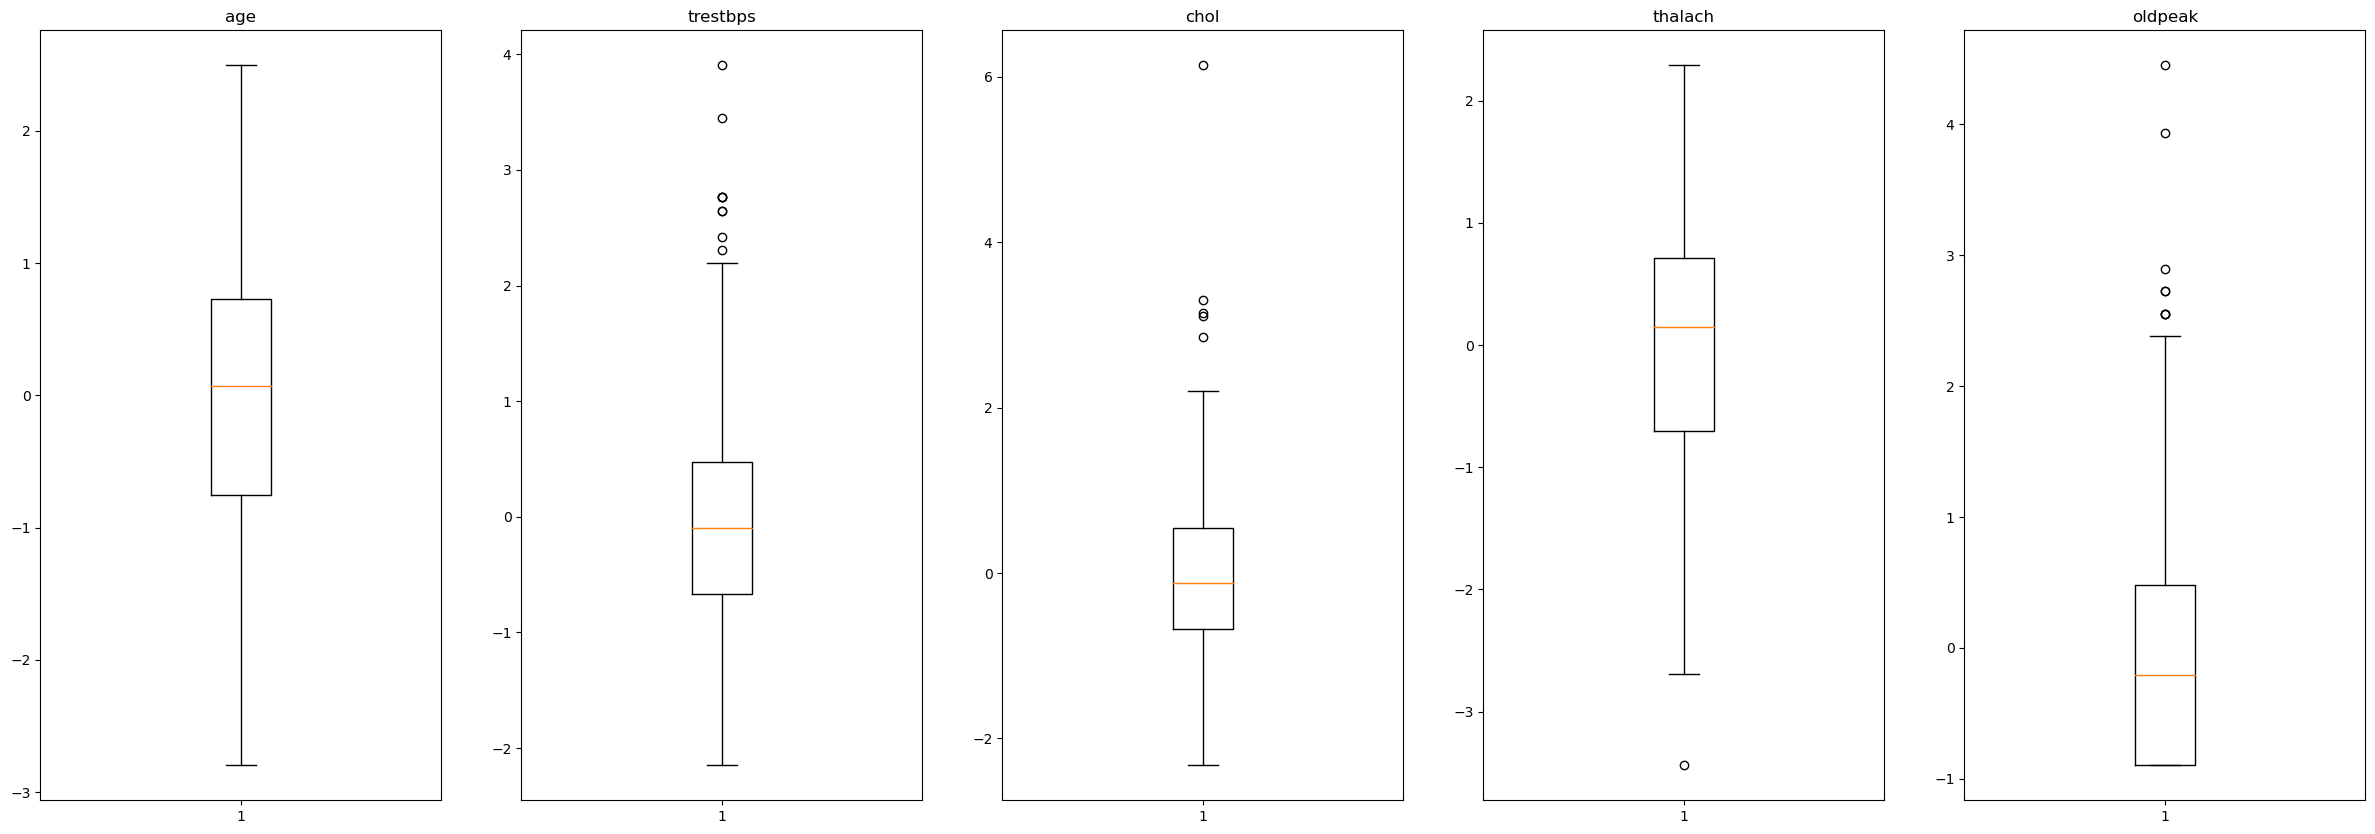

In [17]:
def box_plot_display(data, numerical_variables:list):
    data = data.iloc[:,numerical_variables]
    fig, axs = plt.subplots(1,len(data.columns),figsize=(30,10))

    # Create a boxplot for each dataframe
    for i in range(len(data.columns)):
        axs[i].boxplot(data.iloc[:,i].to_numpy(),whis=1.5)
        axs[i].set_title(data.columns[i])

    plt.show()
    
box_plot_display(data,numerical_variables)

[Q4]
[Q
3
]
의
Box plot
을
근거로
각
변수들에
대한
이상치
(
너무
값이
크거나
작은
객체
)
조건을
정의하고
,
해당하는
객체들을
데이터셋에서
제거해
보시오
.

In [18]:
def outlier_erase(data, numerical_variables:list):
    df = data.iloc[:,numerical_variables]
    Q3 = df.quantile(0.75)
    Q1 = df.quantile(0.25)
    IQR = Q3 - Q1
    K = 1.5
    upper = df[Q1 - K*IQR < df].notna()
    under = df[Q3 + K*IQR > df].notna()
    row_index = []
    for i in range(len(data)):
        if (df[upper * under].iloc[i].isna().value_counts()[0]) == len(df.columns):
            row_index.append(i)
            
    dt_outlier_ers = data.iloc[row_index]
    dt_outlier_ers.index = list(range(len(dt_outlier_ers)))
    return dt_outlier_ers

dt_outlier_ers = outlier_erase(data, numerical_variables)

In [19]:
dt_outlier_ers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0.290464,0,0,0.478391,-0.101730,0,1,-1.165281,1,-0.724323,1,0,3,0
275,-1.033002,1,3,-1.234996,0.342756,0,1,-0.771706,0,0.138373,1,0,3,0
276,1.503641,1,0,0.706843,-1.029353,1,1,-0.378132,0,2.036303,1,2,3,0
277,0.290464,1,0,-0.092738,-2.227533,0,1,-1.515125,1,0.138373,1,1,3,0


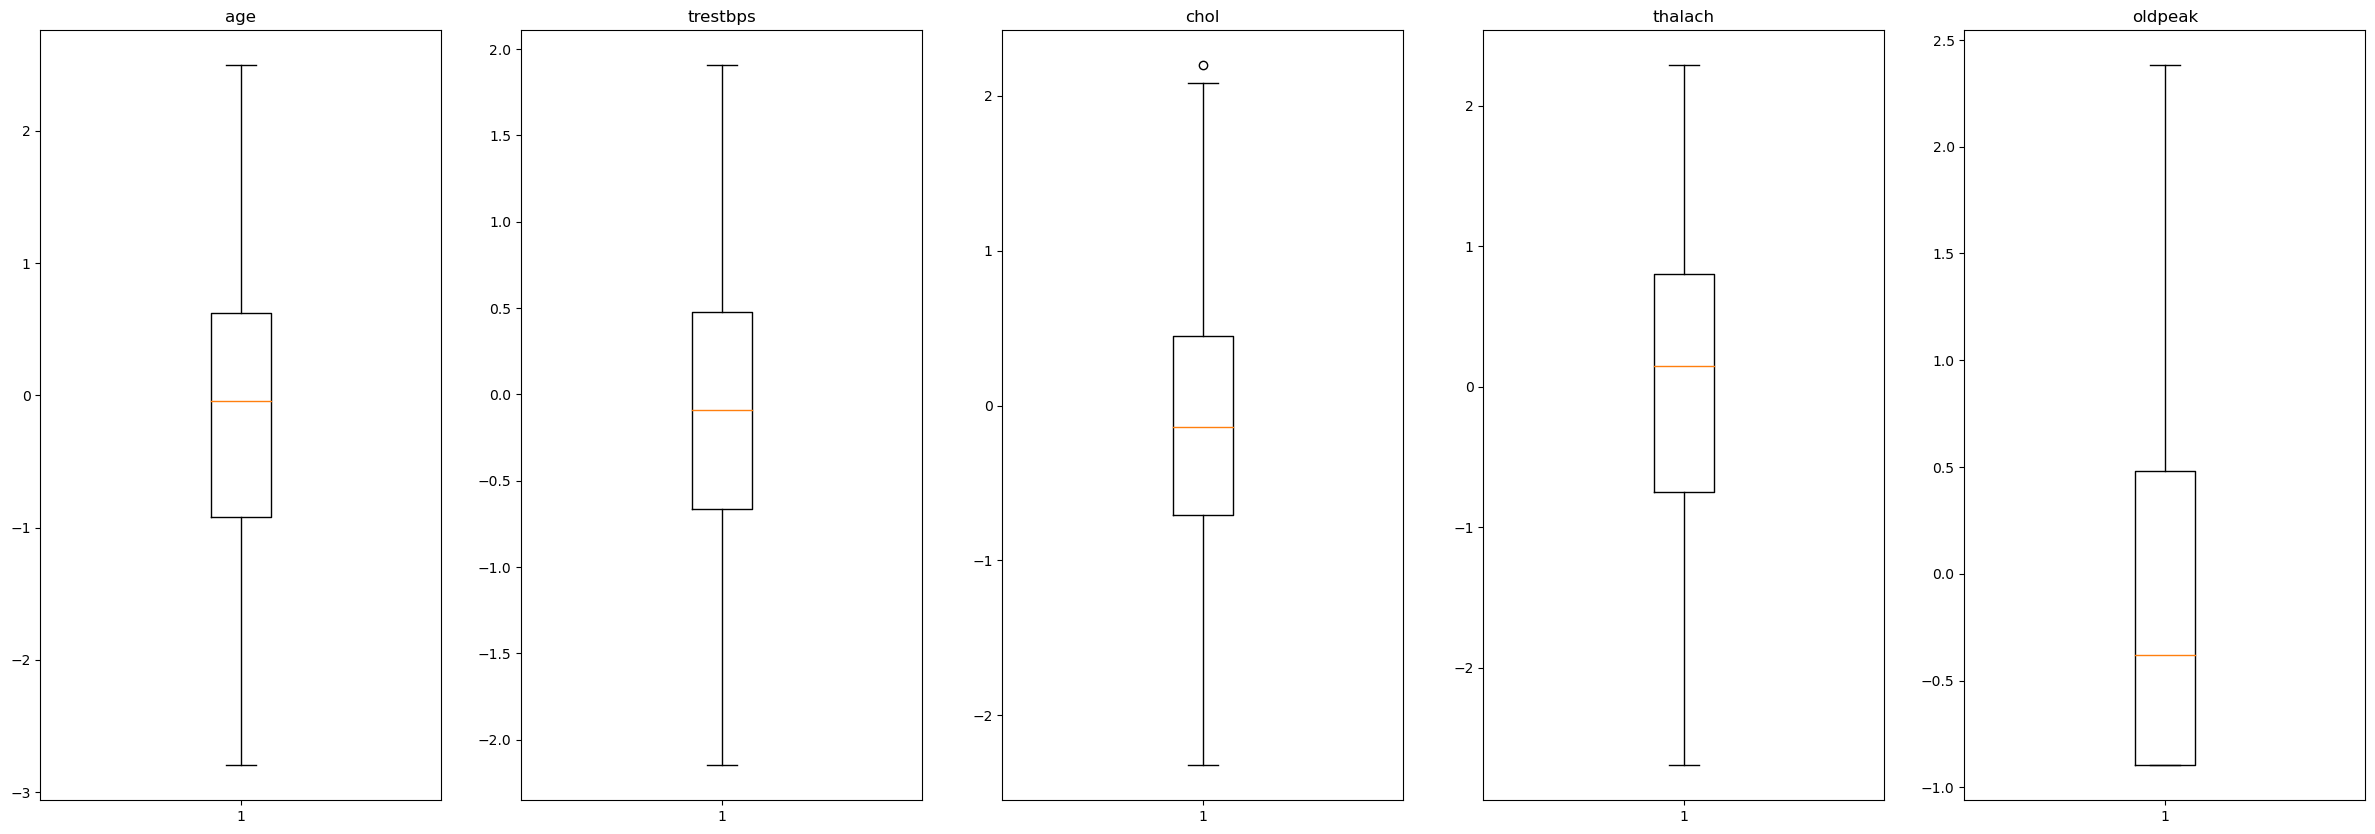

In [20]:
box_plot_display(dt_outlier_ers,numerical_variables)


<Axes: xlabel='target', ylabel='count'>

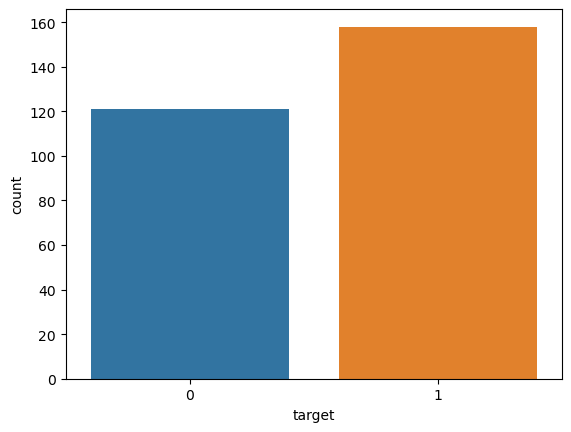

In [21]:
sns.countplot(data=dt_outlier_ers, x='target')

[Q5]
가능한
모든
두
쌍의
입력
변수
조합에
대한
산점도
(
scatter plot)
를
도시하고
적절한
정량적
지표를
사용하여
상관관계를
판단해
보시오
.

1. 어떤
두
조합의
변수들이
서로
강한
상관관계가
있다고
할
수
있는가
?

2. 강한
상관관계가
존재하는
변수
조합들
중에
대표
변수를
하나씩만
선택해서
전체
변수의
개수를
감소시켜
보시오
([Q7]
에서
사용함
)

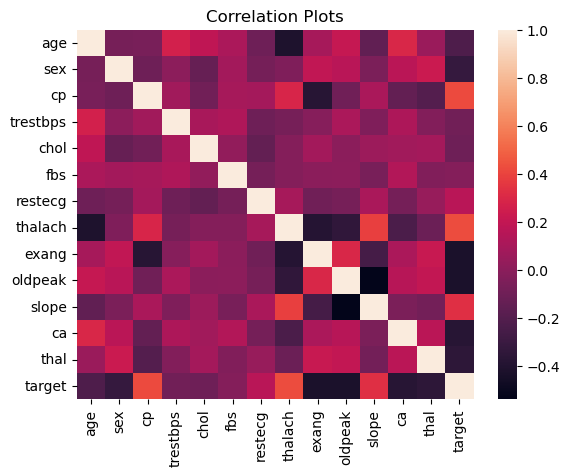

In [22]:
correlation_plot(dt_outlier_ers)

trestbps/age, ca/age, thalach/cp, thalach/slope, exang/oldpeak

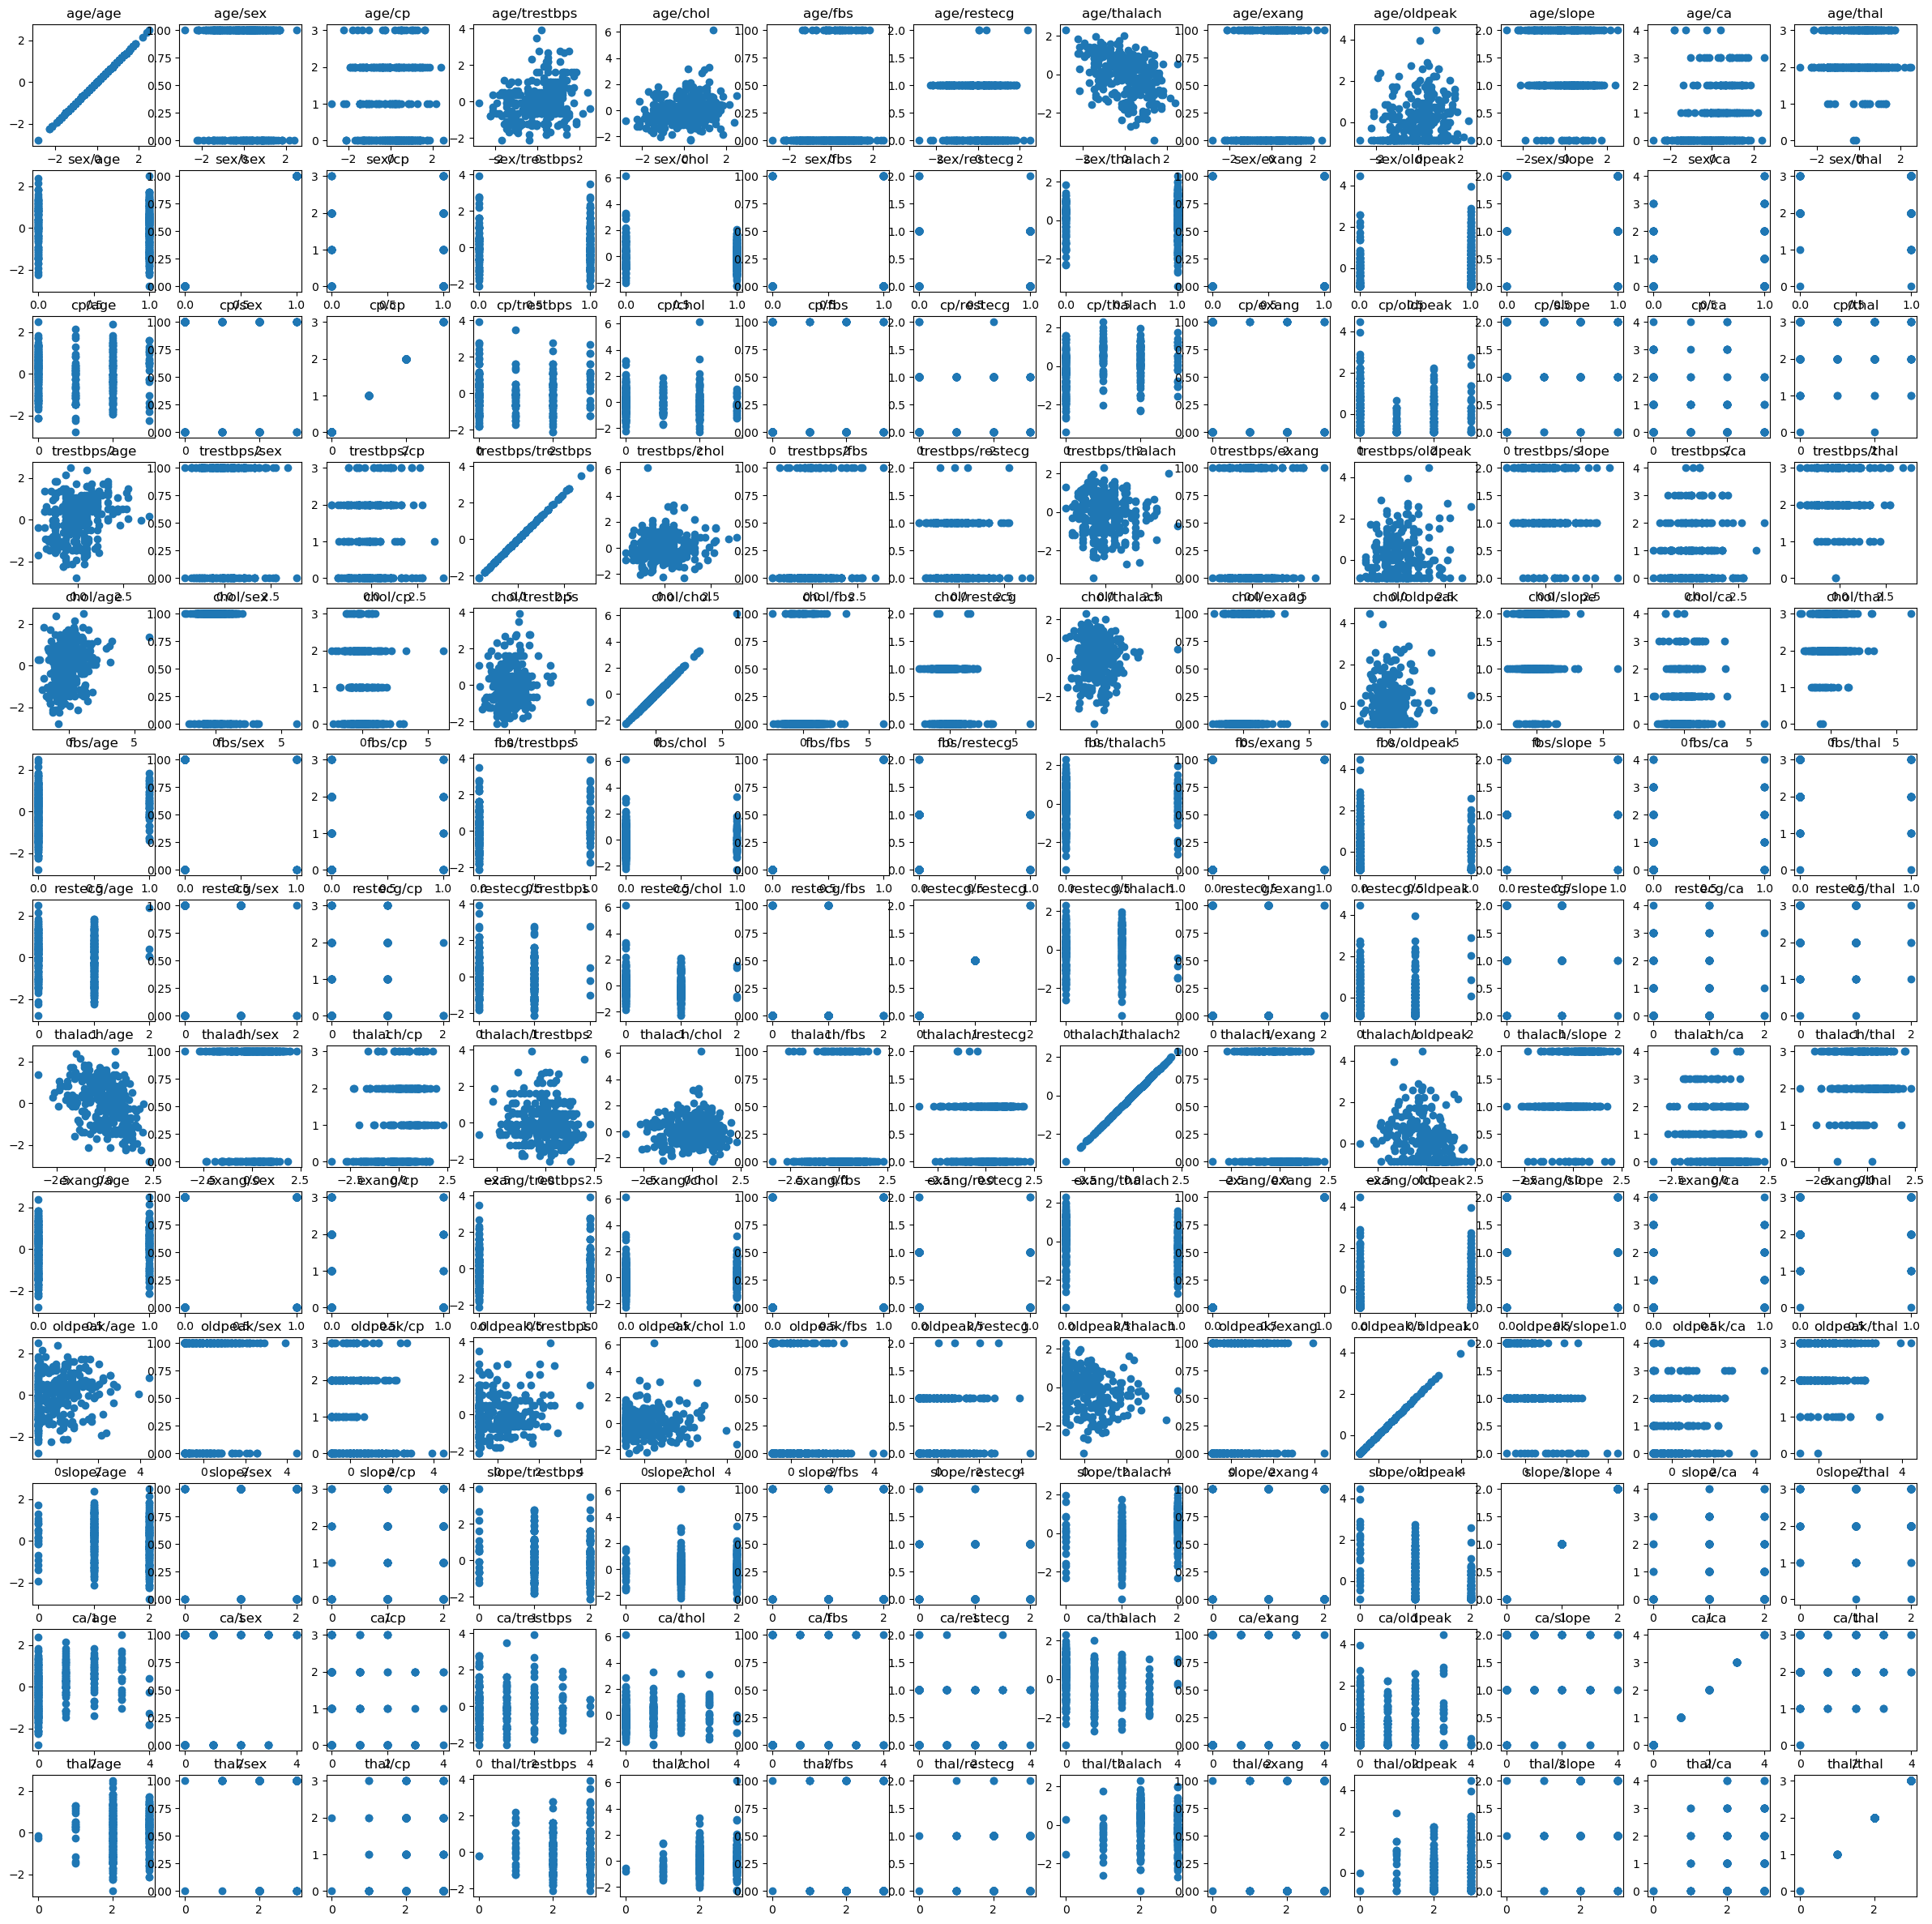

In [23]:
def scatter_plot_desplay_Xs(data, target_idx:int):
    X = data.iloc[:,:target_idx]
    num_var = len(X.columns)
    
    fig, axs = plt.subplots(num_var,num_var,figsize=(30,30))

    for i in range(num_var):
        for j in range(num_var):
            axs[i,j].scatter(X.iloc[:,i], X.iloc[:,j])
            axs[i,j].set_title(str(X.columns[i])+'/'+ str(X.columns[j]))

    plt.show()
    
    
scatter_plot_desplay_Xs(data,-1)

age drop

thalach drop

exang drop

In [24]:
q7_data = dt_outlier_ers.drop(columns=['age','thalach','exang'])

In [25]:
q7_data

,sex,cp,trestbps,chol,fbs,restecg,oldpeak,slope,ca,thal,target
0,1,3,0.763956,-0.256334,1,0,1.087338,0,0,1,1
1,1,2,-0.092738,0.072199,0,1,2.122573,0,0,2,1
2,0,1,-0.092738,-0.816773,0,0,0.310912,2,0,2,1
3,1,1,-0.663867,-0.198357,0,1,-0.206705,2,0,2,1
4,0,0,-0.663867,2.082050,0,1,-0.379244,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
274,0,0,0.478391,-0.101730,0,1,-0.724323,1,0,3,0
275,1,3,-1.234996,0.342756,0,1,0.138373,1,0,3,0
276,1,0,0.706843,-1.029353,1,1,2.036303,1,2,3,0
277,1,0,-0.092738,-2.227533,0,1,0.138373,1,1,3,0


## Train and Analysis

[Q6]
전체
데이터셋을
70%
의
학습
데이터와
30%
의
테스트
데이터로
분할한
후
모든
변수를
사용하여
Logistic
Regression
모델을
학습해
보시오
.
이
때
70:30
으로
구분하는
random
seed
를
저장하시오

1. 유의수준
0.05
에서
유효한
변수의
수는
몇
개인지
확인하고
각
변수들이
본인의
상식
선에서
실제로
유효하다고
할
수
있는지
판단해
보시오
.

2. [Q2]
에서
정성적으로
선택했던
변수들의
P-value
를
확인하고
해당
변수가
모델링
측면에
서
실제로
유효하지
않는
것인지
확인해
보시오
.

3. 학습
데이터와
테스트
데이터에
대한
Confusion
Matrix
를
생성하고
Simple
Accuracy,
Balanced
Correction
Rate
,
F1-Measure
를
산출하여
비교해
보시오

4. 학습
데이터와
테스트
데이터에
대한
AUROC
를
산출하는
함수를
직접
작성하고
이를
사용
하여
학습
/
테스트
데이터셋에
대한
AUROC
를
비교해
보시오


In [26]:
# Performance evaluation function for Classification --------------------------
def perf_eval_clf(y_true: Union[np.array,list], y_pred: Union[np.array,list])->list:
    """
    Input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)
    Return:
    [True_positive_rate(Recall),Precision,True_negative_rate, Accuracy, BCR, F1-score]: scores of classification in a list
    """
    cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("Confusion_matrix")    
    display(pd.DataFrame({'Positive':[tp,fp],'Negative':[fn,tn]},index=['True','False']))

    TPR = round(tp/(tp+fn),3) #recall
    TNR = round(tn/(tn+fp),3)
    PRE = round(tp/(tp+fp),3)
    ACC = round((tp+tn)/(tp+tn+fp+fn),3)
    BCR = round(np.sqrt([TPR*TNR])[0],3)  
    F1 = round((2*TPR*PRE)/(TPR+PRE),3)  
    
    return [TPR, PRE, TNR, ACC, BCR, F1]
    

In [27]:
def logit_pvalue(model,x,feature_names,cls=0):
    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[cls]) + 1
    if len(model.intercept_)>1:
        feature_names=['constant'] + feature_names
        coefs = np.concatenate([np.array(model.intercept_[cls].reshape(1,)), model.coef_[cls]])
    elif len(model.intercept_)==1:
        feature_names=['constant'] + feature_names
        coefs = np.concatenate([model.intercept_, model.coef_[0]])
    else:
        coefs = model.coef_[cls]
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p1[i,1] * p1[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 = coefs/se
    p1 = (1 - norm.cdf(abs(t1))) * 2
    pvalue_dict = {key:round(value,4) for key,value in zip(feature_names,p1)}
    display(pd.DataFrame(pvalue_dict,columns=pvalue_dict.keys(),index=['P-value']).T)
    return pvalue_dict

In [28]:
def display_coefs(model, name: str) -> None:
    """
    input:
    model: fitted model with given variables
    name: name of the model
    """
    features = ['Constant']+model.feature_names_in_.tolist() if model.intercept_ else model.feature_names_in_.tolist()
    coefs = [model.intercept_[0]]+model.coef_[0].tolist() if model.intercept_ else model.coef_[0].tolist()
    print(f'Model : {name}')
    display(pd.DataFrame({'features':features,'coefs':coefs}))

In [90]:
def display_result(result_dict: dict, metric_names: list = ['TPR(Recall)','Precision','TNR','ACC','BCR','F1','AUROC']):
    
    result_df = pd.DataFrame(result_dict).T
    result_df.index = list(result_dict.keys())
    result_df.columns = metric_names
    
    display(result_df)
    
result_dict = {}

In [30]:
original_data = dt_outlier_ers

split_params = {
    'test_size':0.3,
    'random_state': 1999
    }
df_train, df_test = train_test_split(original_data, **split_params)

In [31]:
x_trn, y_trn, x_tst, y_tst = df_train.drop(columns=['target']),df_train['target'],df_test.drop(columns=['target']),df_test['target']
feature_names = list(x_trn.columns)

### AUROC 함수 작성

In [ ]:
def auroc_dtframe_init(model,x,y):
    prob_heartdisease = model.predict_proba(x)[:,1]
    label_heartdisease = y
    AUROC = pd.DataFrame({'P(HD)': list(prob_heartdisease), 'Label':list(label_heartdisease)}).sort_values(by='P(HD)',ascending=False)
    AUROC.index = list(range(len(AUROC)))
    
    TPR_ = []
    FPR_ = []
    
    for i in range(len(AUROC)):
        cutoff_value = AUROC['P(HD)'][i]
        pred = AUROC['P(HD)'].apply(lambda x: 1 if x>=cutoff_value else 0)
        cm = confusion_matrix(y_true = AUROC['Label'], y_pred = pred)
        tn, fp, fn, tp = cm.ravel()
        TPR = round(tp/(tp+fn),3) #recall
        FPR = round(fp/(tn+fp),3)
        TPR_.append(TPR)
        FPR_.append(FPR)
    
    AUROC['TPR'] = TPR_
    AUROC['FPR'] = FPR_
    
    AUROC.loc[len(AUROC)+1] = [None,None,None,None]
    AUROC=AUROC.shift()
    AUROC.loc[0] = [np.nan,np.nan,0,0] 
    
    return AUROC
    

def auroc(model, x_trn, x_tst, y_trn, y_tst):
    AUROC_trn = auroc_dtframe_init(model, x_trn,y_trn)
    AUROC_tst = auroc_dtframe_init(model, x_tst,y_tst)
    
    return (AUROC_trn , AUROC_tst)
    




In [91]:
seed = 1234
full_config = {
    'penalty': None,
    'fit_intercept':True,
    'max_iter':int(1e+5),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1
}

#solving name of the selected features
features_dict = {}
features_dict['All Variables'] = ['constant']+feature_names

full_model = LogisticRegression(**full_config).fit(x_trn,y_trn)
logit_pvalue(full_model, x_trn, feature_names)

AUROC_trn, AUROC_tst = auroc(full_model,x_trn,x_tst,y_trn,y_tst)
trn_AUROC_Score = round(np.sum(AUROC_trn['TPR']*AUROC_trn['FPR']),3)
tst_AUROC_Score = round(np.sum(AUROC_tst['TPR']*AUROC_tst['FPR']),3)

y_pred_train = full_model.predict(x_trn)
y_pred = full_model.predict(x_tst)
print("Train dataset")
result_dict['All variables_train'] = perf_eval_clf(y_trn,y_pred_train)+[trn_AUROC_Score]
print("Test dataset")
result_dict['All variables_test'] = perf_eval_clf(y_tst,y_pred)+[tst_AUROC_Score]
display_coefs(full_model, 'All_variables')
display_result(result_dict,)

,P-value
constant,0.0040
age,0.4527
sex,0.0005
cp,0.0335
trestbps,0.1593
chol,0.1373
fbs,0.8477
restecg,0.7815
thalach,0.0328
exang,0.0068


Train dataset
Confusion_matrix


,Positive,Negative
True,97,11
False,18,69


Test dataset
Confusion_matrix


,Positive,Negative
True,36,14
False,4,30


Model : All_variables


,features,coefs
0,Constant,3.241566
1,age,-0.198098
2,sex,-2.054318
3,cp,0.497288
4,trestbps,-0.425618
5,chol,-0.424082
6,fbs,0.126687
7,restecg,0.129460
8,thalach,0.661703
9,exang,-1.494484


,TPR(Recall),Precision,TNR,ACC,BCR,F1,AUROC
All variables_train,0.898,0.843,0.793,0.851,0.844,0.87,49.462
All variables_test,0.720,0.900,0.882,0.786,0.797,0.80,21.134


유의수준 0.05에서 유효한 변수 8개 (Constant 제외시 7개)

- constant	0.0040
- sex	0.0005
- cp	0.0335
- thalach	0.0328
- exang	0.0068
- slope	0.0290
- ca	0.0001
- thal	0.0018


상식선에서 그러한지 검색해보자.

exang, oldpeak, ca, thai 모델링 측면에서 exang와 ca, thai 유의하게 드러났음. 이 세가지 변수의 경우 모두 Categorical Variable 이어서 결과가 다르게 나온것으로 추정됨. 배경지식 공부 후 정리 필요

Train, Test Result 비교시 모든 방면에서 Train이 훨씬 좋은 성능을 보임. -> Train으로 학습을 했으니 당연

[Q7]
[Q5]
에서
변수
간
상관관계를
기준으로
선택한
변수들만을
사용하여
[Q6]
에서
사용한
학습
/
테스트
70:30
분할
데이터으로
Logistic
Regression
모델을
학습해
보시오
.
1.
유의수준
0.05
에서
유효한
변수의
수는
몇
개인지
확인하고
[Q6
-
1]
의
결과와
비교하시오
.
2.
학습
데이터와
테스트
데이터에
대한
Confusion
Matrix
를
생성하고
생성하고
Simple
Accuracy,
Balanced
Correction
Rate,
F1
-
Measure
를
산출한
뒤
,
[Q6
-
3]
의
결과와
비교해
보
시오
.
3.
학습
/
테스트
데이터셋에
대한
AUROC
를
산출하여
[Q6
-
4]
의
결과와
비교해
보시오
